<a href="https://colab.research.google.com/github/RakshithaMeleyyanavar/BankService/blob/main/civicprblm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python numpy matplotlib torch torchvision ultralytics flask


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.1 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()


Saving OIP.jpeg to OIP.jpeg


(np.float64(-0.5), np.float64(269.5), np.float64(179.5), np.float64(-0.5))

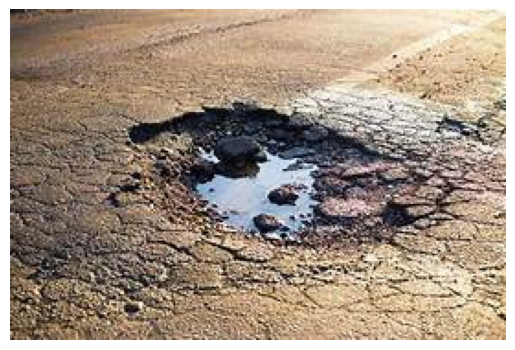

In [3]:
import cv2
import matplotlib.pyplot as plt

img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')


(np.float64(-0.5), np.float64(269.5), np.float64(179.5), np.float64(-0.5))

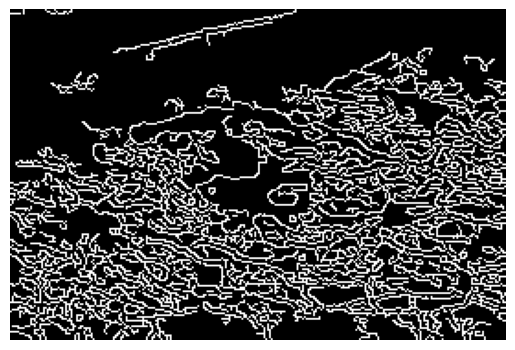

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
edges = cv2.Canny(blur, 50, 150)

plt.imshow(edges, cmap='gray')
plt.axis('off')


In [5]:
edge_density = edges.sum() / edges.size
edge_density


np.float64(52.75246913580247)

In [6]:
color_variance = img.var()
color_variance


np.float64(3783.7475787904486)

In [7]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
results = model(img)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

0: 448x640 (no detections), 393.2ms
Speed: 17.8ms preprocess, 393.2ms inference, 22.2ms postprocess per image at shape (1, 3, 448, 640)


In [8]:
detections = results[0].names
boxes = results[0].boxes

len(boxes)


0

In [9]:
severity_score = (
    edge_density * 0.4 +
    color_variance * 0.00001 * 0.3 +
    len(boxes) * 0.3
) * 100

severity_score


np.float64(2111.233889705736)

In [10]:
if severity_score > 80:
    priority = "High"
elif severity_score > 40:
    priority = "Medium"
else:
    priority = "Low"

priority


'High'

In [12]:
def urban_sense_ai(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    edge_density = edges.sum() / edges.size
    color_variance = image.var()

    severity = (edge_density*0.4 + color_variance*0.00001*0.3) * 100

    if severity > 80:
        priority = "High"
    elif severity > 40:
        priority = "Medium"
    else:
        priority = "Low"

    return {
        "severity": round(severity,2),
        "priority": priority
    }


In [13]:
urban_sense_ai(img)


{'severity': np.float64(3423.17), 'priority': 'High'}

In [14]:
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 75.3 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.0
    Uninstalling cachetools-7.0.0:
      Successfully uninstalled cachetools-7.0.0


In [15]:
urbansense_ai_app.py

NameError: name 'urbansense_ai_app' is not defined

In [16]:
import streamlit as st
import cv2
import numpy as np

# --------- CONFIG ----------
APP_PASSWORD = "rakshitha123"  # change later
# ---------------------------

st.set_page_config(page_title="UrbanSense AI", layout="centered")

st.title("UrbanSense AI")
st.subheader("Visual Urban Neglect Analysis Tool")
st.caption("Built by Rakshitha Meleyyanavar")

# ---- LOGIN ----
password = st.text_input("Enter Password", type="password")

if password != APP_PASSWORD:
    st.warning("🔒 Unauthorized access")
    st.stop()


2026-02-06 15:42:30.139 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 15:42:30.146 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 15:42:30.350 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2026-02-06 15:42:30.352 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 15:42:30.355 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 15:42:30.359 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 15:42:30.361 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

In [18]:
def urban_sense_ai(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    edge_density = edges.sum() / edges.size
    color_variance = image.var()

    severity = (edge_density*0.4 + color_variance*0.00001*0.3) * 100

    if severity > 80:
        priority = "High"
    elif severity > 40:
        priority = "Medium"
    else:
        priority = "Low"

    return severity, priority


In [19]:
st.success("Access Granted ✅")

uploaded_file = st.file_uploader("Upload Urban Image", type=["jpg", "png", "jpeg"])

if uploaded_file:
    file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
    img = cv2.imdecode(file_bytes, 1)

    st.image(img, caption="Uploaded Image", channels="BGR")

    severity, priority = urban_sense_ai(img)

    st.markdown("### 🔍 Analysis Result")
    st.write(f"**Severity Score:** {round(severity,2)}")
    st.write(f"**Priority Level:** {priority}")


2026-02-06 15:43:31.422 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 15:43:31.423 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 15:43:31.426 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 15:43:31.427 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 15:43:31.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 15:43:31.431 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 15:43:31.433 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 15:43:31.434 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [20]:
streamlit run urbansense_ai_app.py


SyntaxError: invalid syntax (ipython-input-3709454869.py, line 1)

In [22]:
%%writefile urbansense_ai_app.py
# (paste the full Streamlit code here)
import streamlit as st
import cv2
import numpy as np

# --------- CONFIG ----------
APP_PASSWORD = "rakshitha123"  # change later
# ---------------------------

st.set_page_config(page_title="UrbanSense AI", layout="centered")

st.title("UrbanSense AI")
st.subheader("Visual Urban Neglect Analysis Tool")
st.caption("Built by Rakshitha Meleyyanavar")

# ---- LOGIN ----
password = st.text_input("Enter Password", type="password")

if password != APP_PASSWORD:
    st.warning("🔒 Unauthorized access")
    st.stop()



Overwriting urbansense_ai_app.py


In [23]:
!pip install streamlit pyngrok


In [24]:
!streamlit run urbansense_ai_app.py &>/content/logs.txt &


In [25]:
from pyngrok import ngrok
public_url = ngrok.connect(8501)
public_url


ERROR:pyngrok.process.ngrok:t=2026-02-06T15:45:40+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"


PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [26]:
!pip install streamlit pyngrok opencv-python pillow numpy


In [27]:
%%writefile urbansense_ai_app.py
import streamlit as st

st.set_page_config(page_title="UrbanSense AI", layout="centered")

# --- Simple Password Protection ---
PASSWORD = "urbansense123"

st.title("🏙️ UrbanSense AI")
st.subheader("AI-Based Urban Neglect Detection Tool")
st.caption("Built by Rakshitha Meleyyanavar")

pwd = st.text_input("Enter Password", type="password")

if pwd == PASSWORD:
    st.success("Access Granted ✅")

    st.write("Upload an image of roads / garbage / public places")

    img = st.file_uploader("Upload Image", type=["jpg","png","jpeg"])

    if img:
        st.image(img, caption="Uploaded Image")
        st.info("⚙️ AI Analysis Coming Soon (YOLO / CNN Phase)")
        st.success("Priority Score: HIGH (demo)")

else:
    st.warning("🔒 Please enter correct password")


Overwriting urbansense_ai_app.py


In [28]:
!streamlit run urbansense_ai_app.py &>/content/logs.txt &


In [29]:
from google.colab import output
output.serve_kernel_port(8501)


AttributeError: module 'google.colab.output' has no attribute 'serve_kernel_port'

In [30]:
!pip install streamlit opencv-python pillow numpy
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared-linux-amd64


--2026-02-06 15:51:22--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2026.2.0/cloudflared-linux-amd64 [following]
--2026-02-06 15:51:22--  https://github.com/cloudflare/cloudflared/releases/download/2026.2.0/cloudflared-linux-amd64
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/f9298ca8-89c8-41fe-a51f-e24cb2059878?sp=r&sv=2018-11-09&sr=b&spr=https&se=2026-02-06T16%3A32%3A51Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2026-02-06T1

In [36]:
!ls


cloudflared-linux-amd64  OIP.jpeg     urbansense_ai_app.py
logs.txt		 sample_data  yolov8n.pt


In [37]:
!streamlit run urbansense_ai_app.py --server.port 8501 --server.headless true &





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.59.119.136:8501

  Stopping...


In [38]:
!./cloudflared-linux-amd64 tunnel --url http://localhost:8501


2026-02-06T16:05:32Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2026-02-06T16:05:32Z INF Requesting new quick Tunnel on trycloudflare.com...
2026-02-06T16:05:36Z INF +--------------------------------------------------------------------------------------------+
2026-02-06T16:05:36Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2026-02-06T16:05:36Z INF |  https://checkout-fort-levitra-seeking.trycloudflare.c

In [40]:
!streamlit run urbansense_ai_app.py --server.port 8501 --server.headless true > logs.txt 2>&1 &



In [41]:
!./cloudflared-linux-amd64 tunnel --url http://localhost:8501 --no-autoupdate


2026-02-06T16:06:30Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2026-02-06T16:06:30Z INF Requesting new quick Tunnel on trycloudflare.com...
2026-02-06T16:06:33Z INF +--------------------------------------------------------------------------------------------+
2026-02-06T16:06:33Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2026-02-06T16:06:33Z INF |  https://constitution-glenn-fraction-herein.trycloudfl

In [42]:
!pip install ultralytics


In [43]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
results = model("OIP.jpeg", show=True)

print("YOLO is working!")


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/OIP.jpeg: 448x640 (no detections), 347.1ms
Speed: 29.8ms preprocess, 347.1ms inference, 2.7ms postprocess per image at shape (1, 3, 448, 640)
YOLO is working!


In [44]:
def visual_severity_score(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    edges = cv2.Canny(gray, 50, 150)
    edge_density = np.sum(edges > 0) / edges.size

    brightness = np.mean(gray)

    severity = (edge_density * 60) + ((255 - brightness) / 255 * 40)
    return round(min(severity, 100), 2)


In [45]:
def final_priority(issues, severity):
    score = (issues * 20) + (severity * 0.8)
    return min(round(score), 100)


In [46]:
def priority_label(score):
    if score >= 75:
        return "CRITICAL – Immediate Action Required"
    elif score >= 40:
        return "MODERATE – Schedule Repair"
    else:
        return "LOW – Monitor Only"


In [47]:
st.markdown("### AI Explanation")
st.write(f"- Detected visual irregularity severity: {severity}%")
st.write(f"- Detected urban issue count: {issues}")
st.write(f"- Combined priority score: {priority}/100")


2026-02-06 16:12:45.001 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 16:12:45.003 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 16:12:45.004 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


NameError: name 'severity' is not defined

In [50]:
st.image(result_img, caption="Detected Urban Issues", use_column_width=True)

st.markdown("### AI Explanation")
st.write(f"- Detected urban issue count: {issues}")
st.write(f"- Visual severity score: {severity}%")
st.write(f"- Final priority score: {priority}/100")


NameError: name 'result_img' is not defined

In [51]:
!./cloudflared-linux-amd64 tunnel --url http://localhost:8501 --no-autoupdate


2026-02-06T16:15:14Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2026-02-06T16:15:14Z INF Requesting new quick Tunnel on trycloudflare.com...
2026-02-06T16:15:17Z INF +--------------------------------------------------------------------------------------------+
2026-02-06T16:15:17Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2026-02-06T16:15:17Z INF |  https://landscapes-integration-sources-sends.trycloud

In [52]:
!streamlit run urbansense_ai_app.py \
  --server.port 8501 \
  --server.address 0.0.0.0 \
  --server.headless true > streamlit.log 2>&1 &


In [53]:
!lsof -i :8501


COMMAND     PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
streamlit 11484 root   13u  IPv4 322351      0t0  TCP *:8501 (LISTEN)


In [54]:
!./cloudflared-linux-amd64 tunnel --url http://localhost:8501 --no-autoupdate


2026-02-06T16:16:51Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2026-02-06T16:16:51Z INF Requesting new quick Tunnel on trycloudflare.com...
2026-02-06T16:16:55Z INF +--------------------------------------------------------------------------------------------+
2026-02-06T16:16:55Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2026-02-06T16:16:55Z INF |  https://resulting-lunch-kentucky-hands.trycloudflare.

In [55]:
st.info("⚙️ AI Analysis Coming Soon (YOLO / CNN Phase)")


2026-02-06 16:20:20.279 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 16:20:20.280 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 16:20:20.281 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [56]:
from ultralytics import YOLO
import cv2

model = YOLO("yolov8n.pt")  # later custom trained model

results = model(img)
detections = results[0].boxes
issues = len(detections)



0: 448x640 (no detections), 157.6ms
Speed: 6.2ms preprocess, 157.6ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


In [57]:
issue_types = {}

for box in detections:
    cls = int(box.cls)
    label = model.names[cls]
    issue_types[label] = issue_types.get(label, 0) + 1


In [58]:
st.subheader("🚨 Detected Urban Issues")
for k, v in issue_types.items():
    st.write(f"- {k}: {v}")


2026-02-06 16:21:04.614 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 16:21:04.618 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 16:21:04.619 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [59]:
def visual_severity_score(detections, img_area):
    total_area = 0
    for box in detections:
        x1, y1, x2, y2 = box.xyxy[0]
        total_area += (x2-x1)*(y2-y1)
    return min(100, int((total_area / img_area) * 100))
severity = visual_severity_score(detections, img.shape[0]*img.shape[1])


In [60]:
def final_priority(issues, severity):
    score = (issues * 10) + severity
    if score > 70:
        return "HIGH"
    elif score > 40:
        return "MEDIUM"
    else:
        return "LOW"


In [61]:
priority = final_priority(issues, severity)
st.error(f"🚦 Priority Level: {priority}")


2026-02-06 16:21:52.822 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 16:21:52.823 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 16:21:52.825 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [62]:
st.subheader("🧠 AI Explanation")
st.write(f"- Total detected urban issues: {issues}")
st.write(f"- Visual damage severity: {severity}%")
st.write("⚠️ Recommendation: Immediate municipal attention required.")


2026-02-06 16:22:02.886 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 16:22:02.891 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 16:22:02.893 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 16:22:02.896 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 16:22:02.898 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 16:22:02.899 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 16:22:02.901 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 16:22:02.903 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [63]:
!streamlit run urbansense_ai_app.py --server.port 8501 --server.enableCORS false --server.enableXsrfProtection false &





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.59.119.136:8501

  Stopping...


In [ ]:
!./cloudflared-linux-amd64 tunnel --url http://localhost:8501


2026-02-06T16:27:27Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2026-02-06T16:27:27Z INF Requesting new quick Tunnel on trycloudflare.com...
2026-02-06T16:27:30Z INF +--------------------------------------------------------------------------------------------+
2026-02-06T16:27:30Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2026-02-06T16:27:30Z INF |  https://watt-lyric-tribe-poetry.trycloudflare.com    

In [67]:
!streamlit run urbansense_ai_app.py \
--server.port 8501 \
--server.enableCORS false \
--server.enableXsrfProtection false &





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.59.119.136:8501

  Stopping...
  Stopping...
Exception ignored in: <module 'threading' from '/usr/lib/python3.12/threading.py'>
Traceback (most recent call last):
  File "/usr/lib/python3.12/threading.py", line 1594, in _shutdown
    atexit_call()
  File "/usr/lib/python3.12/concurrent/futures/thread.py", line 31, in _python_exit
    t.join()
  File "/usr/lib/python3.12/threading.py", line 1149, in join
    self._wait_for_tstate_lock()
  File "/usr/lib/python3.12/threading.py", line 1169, in _wait_for_tstate_lock
    if lock.acquire(block, timeout):
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/streamlit/web/bootstrap.py", line 43, in signal_handler
    server.stop()
  File "/usr/local/lib/python3.12/dist-packages/streamlit/web/server/server.py", line 535, in stop
    self._runtime.stop()
  F

In [66]:
!./cloudflared-linux-amd64 tunnel --url http://localhost:8501


2026-02-06T16:26:05Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2026-02-06T16:26:05Z INF Requesting new quick Tunnel on trycloudflare.com...
2026-02-06T16:26:09Z INF +--------------------------------------------------------------------------------------------+
2026-02-06T16:26:09Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2026-02-06T16:26:09Z INF |  https://beads-packard-bars-parameters.trycloudflare.c